<h1>Лабораторна робота #6</h1>
<h2>Застосування numpy</h2>
<h3>Виконав: Воронюк Володимир ФБ-24</h3>

<p>
  <b>Мета роботи:</b> отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та
  градієнтного спуску.
</p>

<p>
  <b>Постановка задачі:</b> Ознайомитись з теоретичним матеріалом. Створити програму для обчислення лінійної регресії
  методом найменших квадратів та градієнтним спуском.
</p>

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import math

<h2>Завдання 1:</h2>
<p> 1. Згенеруйте двовимірні дані (<i>x</i>, <i>y</i>) за допомогою numpy.random:
бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (<i>y = kx + b</i>) для подальшого аналізу результатів.
</p>

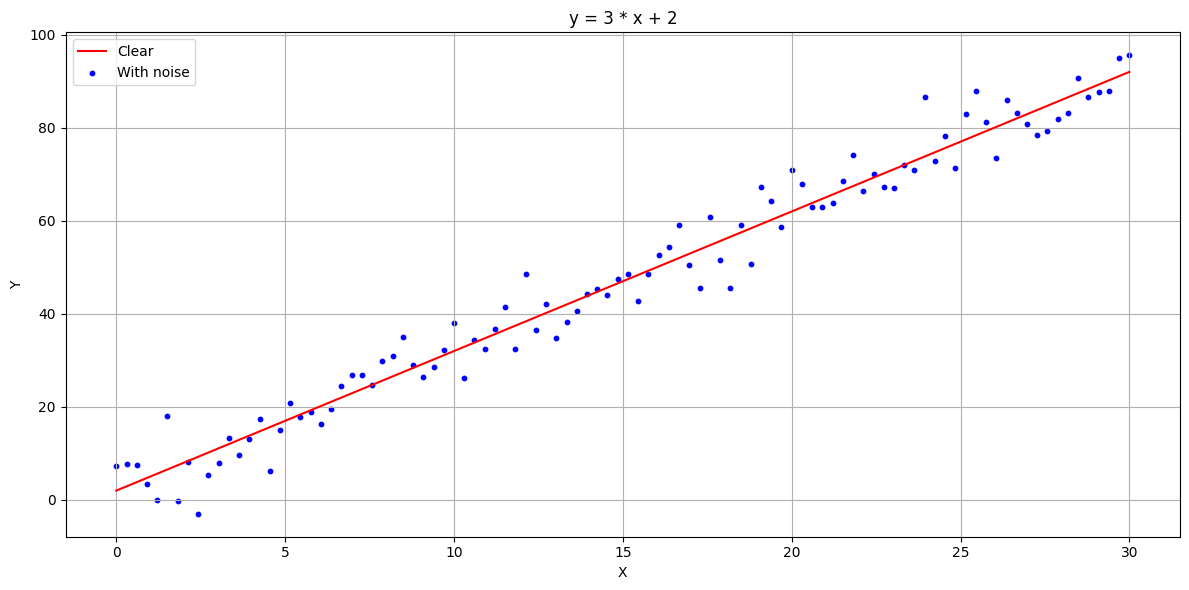

In [111]:
#Генеруємо коефіцієнт нахилу
k = np.random.randint(1, 20)
#генеруємо зсув
b = np.random.randint(0, 15)

VALUES_NUMBER = 100
x = np.linspace(0, 30, VALUES_NUMBER)
y = k * x + b
noise = np.random.normal(0, 5, VALUES_NUMBER)
noise_y = y + noise

plt.figure(figsize=(12, 6))
plt.plot(x, y, color='r', label="Clear")
plt.scatter(x, noise_y, color='b', label="With noise", s=10)
plt.ylabel("Y")
plt.xlabel("X")
plt.title(f"y = {k} * x + {b}")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



<p>
2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок <i>~k</i> та <i>~b</i>.
</p>
<img src="./images/formula_1.png">

Approximation coefficients b1 and b0 are calculated by the method of least squares:
	b1 = 3.015978607194378; b0 = 1.7990136726605783
Original coeficients:
	k = 3; b = 2


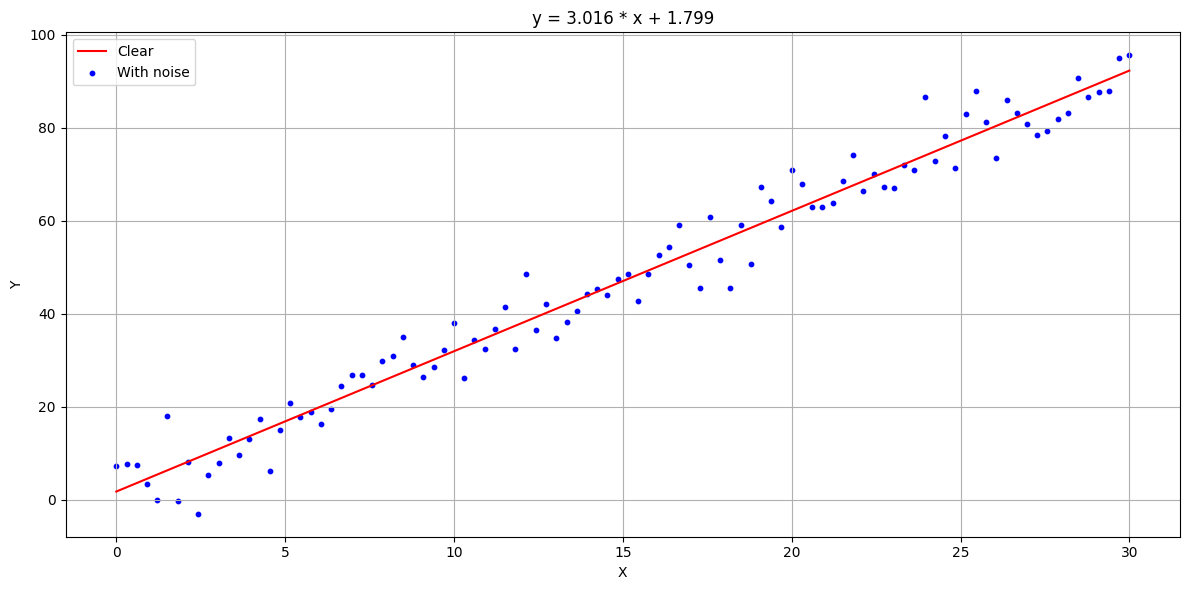

In [112]:
def least_squares_method(x, y):
    avg_y = y.mean()
    avg_x = x.mean()

    p = np.sum((x - avg_x) * (y - avg_y))
    q = np.sum((x - avg_x) ** 2)

    b1 = p / q
    b0 = avg_y - b1 * avg_x

    return b1, b0


lsm_b1, lsm_b0 = least_squares_method(x, noise_y)
print(f"Approximation coefficients b1 and b0 are calculated by the method of least squares:\n\tb1 = {lsm_b1}; b0 = {lsm_b0}")
print(f"Original coeficients:\n\tk = {k}; b = {b}")

lsm_y = lsm_b1 * x + lsm_b0

plt.figure(figsize=(12, 6))
plt.plot(x, lsm_y, color='r', label="Clear")
plt.scatter(x, noise_y, color='b', label="With noise", s=10)
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.grid(True)
plt.title(f"y = {lsm_b1:.3f} * x + {lsm_b0:.3f}")
plt.tight_layout()
plt.show()


<p>
  Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
  степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
  такі є).
</p>

In [113]:
np_pf_aprox_coefs = np.polyfit(x, noise_y, 1)

np_pf_b1 = np_pf_aprox_coefs[0]
np_pf_b0 = np_pf_aprox_coefs[1]

print(f"Aprapproximate coefficients calculated by polyfit:\n\tpf_b1 = {np_pf_b1}; pf_b0 = {np_pf_b0}")
print(f"Difference polyfit coeficients with calculated:")
print(f"\t|pf_b0 - lsm_b0| = {abs(np_pf_b0 - lsm_b0)}; e = {abs(np_pf_b0 - lsm_b0) / np_pf_b0:.5f}%")
print(f"\t|pf_b1 - lsm_b1| = {abs(np_pf_b1 - lsm_b1)}; e = {abs(np_pf_b1 - lsm_b1) / np_pf_b1:.5f}%")

np_pf_y = np_pf_b1 * x + np_pf_b0





Aprapproximate coefficients calculated by polyfit:
	pf_b1 = 3.015978607194378; pf_b0 = 1.799013672660573
Difference polyfit coeficients with calculated:
	|pf_b0 - lsm_b0| = 5.329070518200751e-15; e = 0.00000%
	|pf_b1 - lsm_b1| = 0.0; e = 0.00000%


<p>4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.
</p>

Original coefs: 3, 2
Method of least squares coefs: 3.015978607194378, 1.7990136726605783
Numpy polyfit: 3.015978607194378, 1.799013672660573


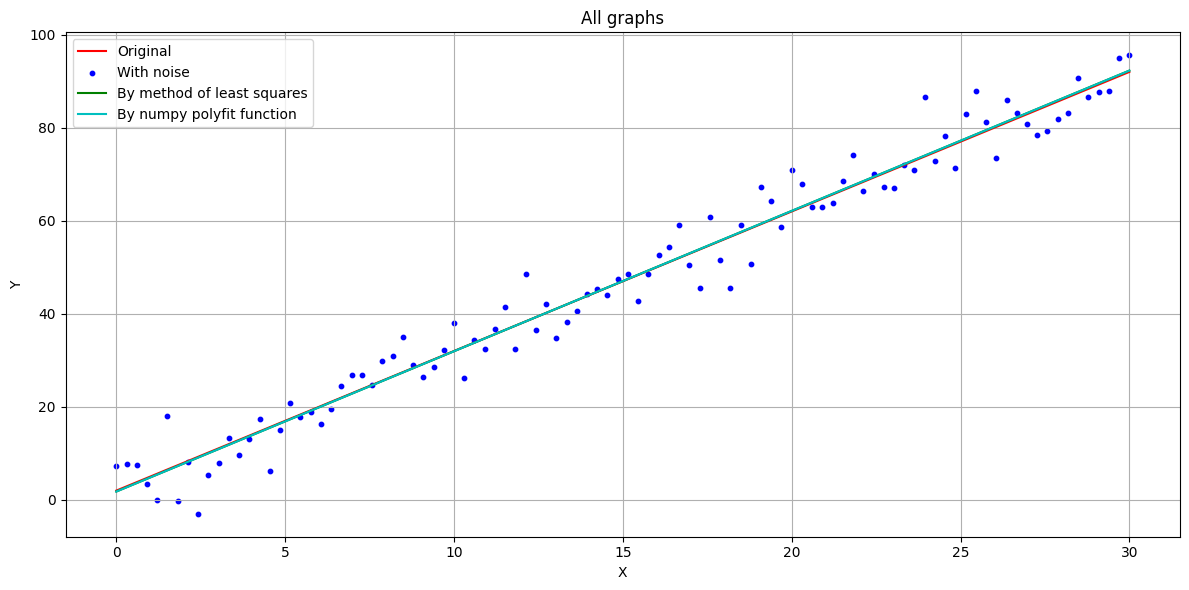

In [114]:
print(f"Original coefs: {k}, {b}")
print(f"Method of least squares coefs: {lsm_b1}, {lsm_b0}")
print(f"Numpy polyfit: {np_pf_b1}, {np_pf_b0}")

plt.figure(figsize=(12, 6))
plt.plot(x, y, color='r', label="Original")
plt.scatter(x, noise_y, color='b', label="With noise", s=10)
plt.plot(x, lsm_y, color='g', label="By method of least squares")
plt.plot(x, np_pf_y, color='c', label="By numpy polyfit function")

plt.legend()

plt.ylabel("Y")
plt.xlabel("X")
plt.grid(True)
plt.title("All graphs")
plt.tight_layout()
plt.show()

<h2>Завдання 2:</h2>
<p>1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок <i>~k</i> та <i>~b</i>. Визначіть оптимальні вхідні параметри: learning_rate, n_iter
</p>
<img src="./images/formula_2.png">

In [115]:
def gradient_descent_method(x, y, learning_rate, n_iter):
    #Step 1
    number_of_values = len(x)
    b0 = 0
    b1 = 1

    for _ in range(n_iter):
        #derative
        #Step 2
        pred_y = b0 + b1 * x

        #Step 3
        der_L_b0 = (-2 / number_of_values) * np.sum(y - pred_y)
        der_L_b1 = (-2 / number_of_values) * np.sum(x * (y - pred_y))

        #Step 4
        b0 -= learning_rate * der_L_b0
        b1 -= learning_rate * der_L_b1

        #Step 5 -> Step2
    
    return b1, b0

learning_rate = 0.001
n_iter = 10000

gdm_b1, gdm_b0 = gradient_descent_method(x, noise_y, learning_rate, n_iter)
gdm_y = gdm_b1 * x + gdm_b0


<p>2. Додайте отриману лінію регресії на загальний графік</p>

Approximation coefficients b1 and b0 are calculated by the method of gradient descent:
	b1 = 3.01651176227521; b0 = 1.788305714584757
	Number of iteration: 10000; learing rage: 0.001
Original coeficients:
	k = 3; b = 2


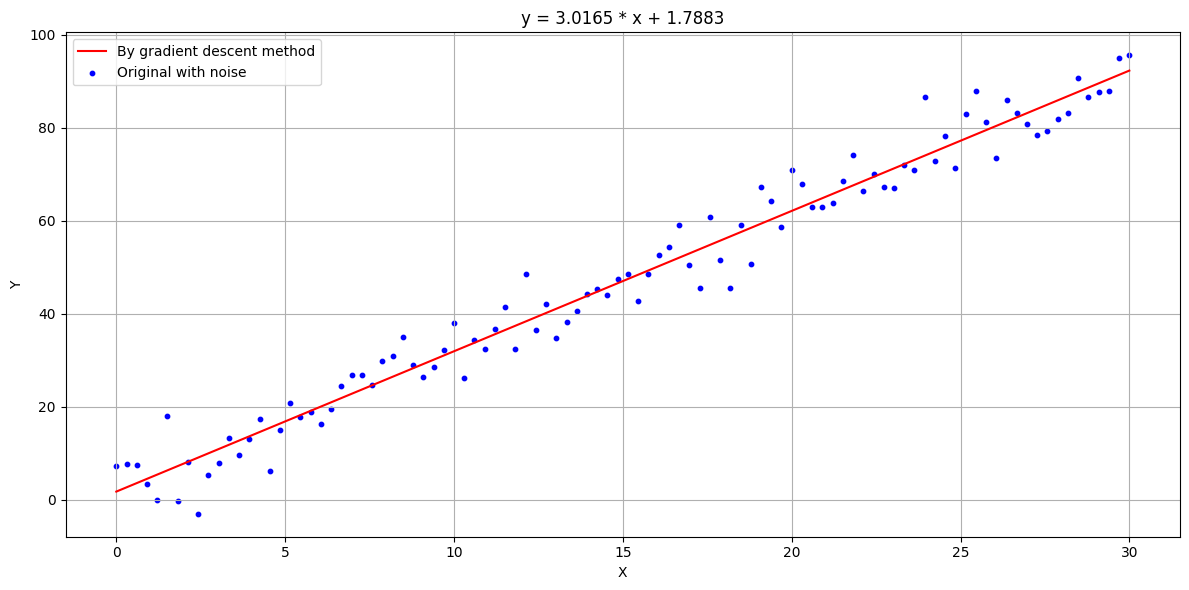

In [116]:

print(f"Approximation coefficients b1 and b0 are calculated by the method of gradient descent:\n\tb1 = {gdm_b1}; b0 = {gdm_b0}")
print(f"\tNumber of iteration: {n_iter}; learing rage: {learning_rate}")
print(f"Original coeficients:\n\tk = {k}; b = {b}")

plt.figure(figsize=(12, 6))
plt.plot(x, gdm_y, color='r', label="By gradient descent method")
plt.scatter(x, noise_y, color='b', label="Original with noise", s=10)
plt.ylabel("Y")
plt.xlabel("X")
plt.title(f"y = {gdm_b1:.4f} * x + {gdm_b0:.4f}")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

<p>
3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки
</p>
<img src="./images/formula3.png">

In [122]:
def calc_mse(x, y, precise=0.001):
    mse_list = np.empty((0, ), dtype=float)
    n_iter_list = np.empty((0, ), dtype=int)
    N = len(x)


    for n_iter in range(100, 10000 + 1, 100):
        b1, b0 = gradient_descent_method(x, y, learning_rate, n_iter)
        mse = (1 / N) * np.sum((y - b0 - b1 * x) ** 2)

        if (len(mse_list) != 0) and (abs(mse_list[-1] - mse) < precise):
            break

        mse_list = np.append(mse_list, mse)
        n_iter_list = np.append(n_iter_list, n_iter)

    return mse_list, n_iter_list

precise = 0.001
mse_list, n_iter_list = calc_mse(x, noise_y, precise)


Min MSE value 23.0253 for number of iterations 4200 with precise 0.001


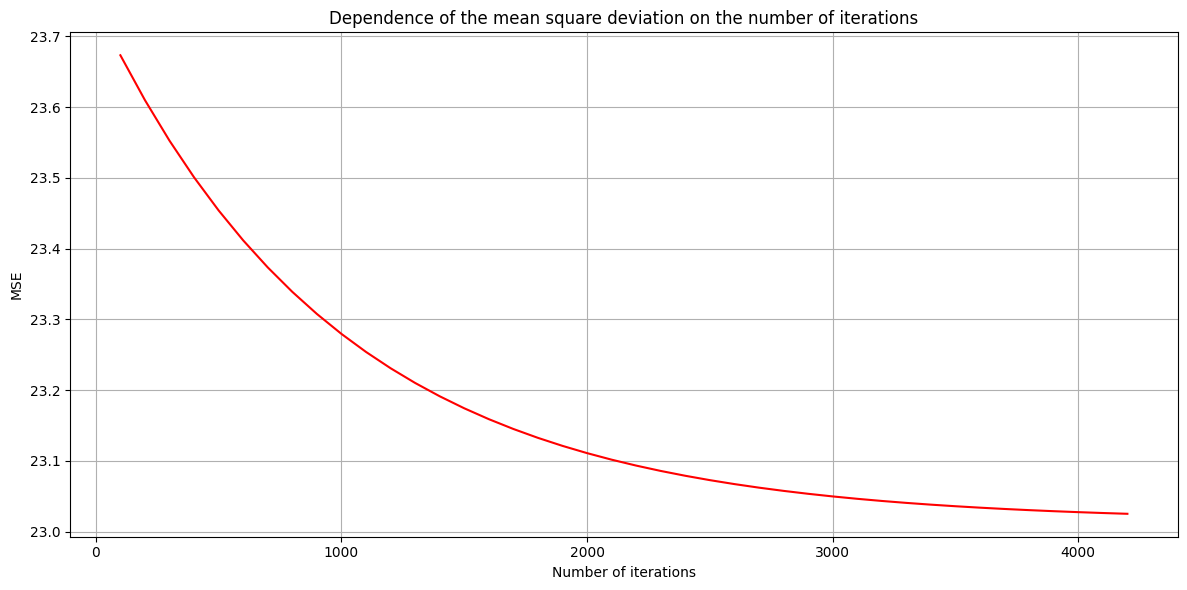

In [123]:
print(f"Min MSE value {mse_list[-1]:.4f} for number of iterations {n_iter_list[-1]} with precise {precise}")
plt.figure(figsize=(12, 6))
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.title("Dependence of the mean square deviation on the number of iterations")
plt.tight_layout()
plt.grid(True)
plt.plot(n_iter_list, mse_list, color='r')
plt.show()


<p>
  Як бачимо, середнє квадратичне відхилення спадає і наближається до конкретного значення (в даному випадку 23.0253) із збільшенням кількості ітерацій для методу градієнтного спуску. Для кількості ітерацій більших за 4200 значення СКВ різняться на число, що менше за 0.001  
</p>

<p>4. Порівняйте отримані результати з результатами попереднього завдання</p>

In [125]:

print(f"Original coefs: {k}, {b}")
print(f"Method of least squares coefs: {lsm_b1:.4f}, {lsm_b0:.4f}")
print(f"Numpy polyfit: {np_pf_b1:.4f}, {np_pf_b0:.4f}")
print(f"Method of gradient descent: {gdm_b1:.4f}, {gdm_b0:.4f}")

Original coefs: 3, 2
Method of least squares coefs: 3.0160, 1.7990
Numpy polyfit: 3.0160, 1.7990
Method of gradient descent: 3.0165, 1.7883
